In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors,preprocessing

## Importing data

In [2]:
# read the data 
train_data= pd.read_csv("D:\\Capstone project\\Capstone Project\\train Data.csv",low_memory=False)
#print(train_data.columns.values),low_memory=False
train_data.head()

,id,release,n_0000,n_0001,n_0002,n_0003,n_0004,n_0005,n_0006,n_0007,...,c_1368,c_1369,c_1370,c_1371,c_1372,c_1373,c_1374,c_1375,c_1376,c_1377
0,11193,a,NaN,NaN,0.025449,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,q,NaN,NaN,NaN
1,11382,a,NaN,NaN,0.031297,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,NaN,NaN,NaN,NaN
2,16531,a,NaN,NaN,0.024475,NaN,NaN,0.342105,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,b,NaN,NaN,NaN
3,1896,a,NaN,NaN,0.041694,NaN,NaN,0.447368,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN
4,18262,c,NaN,NaN,0.038120,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,b,NaN,a,NaN,a,NaN,NaN,NaN


In [3]:
train_data.shape

(14644, 1379)

In [4]:
train_data.columns

Index(['id', 'release', 'n_0000', 'n_0001', 'n_0002', 'n_0003', 'n_0004',
       'n_0005', 'n_0006', 'n_0007',
       ...
       'c_1368', 'c_1369', 'c_1370', 'c_1371', 'c_1372', 'c_1373', 'c_1374',
       'c_1375', 'c_1376', 'c_1377'],
      dtype='object', length=1379)

## creating dataframe for missing values

In [5]:
missdf=pd.DataFrame({'cols':train_data.columns.values,
                          'missing':list(train_data.isnull().sum())})

In [6]:
missdf['missingPerc'] = missdf.missing/train_data.shape[0]

In [7]:
missdf.head()

,cols,missing,missingPerc
0,id,0,0.000000
1,release,0,0.000000
2,n_0000,14625,0.998703
3,n_0001,13884,0.948102
4,n_0002,644,0.043977


In [8]:
#percentage of missing data
train_data1=pd.DataFrame(train_data[missdf[missdf['missingPerc']<0.8]['cols']])

In [9]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Columns: 341 entries, id to c_1377
dtypes: float64(63), int64(9), object(269)
memory usage: 38.1+ MB


## Train data after removal of null columns

In [10]:
train_data1.head()

,id,release,n_0002,n_0005,n_0012,n_0019,n_0028,n_0034,n_0038,n_0039,...,c_1333,c_1335,c_1343,c_1347,c_1348,c_1361,c_1363,c_1372,c_1374,c_1377
0,11193,a,0.025449,0.368421,0.292683,0.0,NaN,0.223881,0.193548,NaN,...,e,w,b,NaN,b,e,b,a,q,NaN
1,11382,a,0.031297,0.315789,0.243902,0.0,NaN,0.104478,0.177419,NaN,...,e,q,b,NaN,b,e,b,a,NaN,NaN
2,16531,a,0.024475,0.342105,0.304878,0.0,NaN,0.119403,0.290323,NaN,...,e,u,a,NaN,b,c,a,a,b,NaN
3,1896,a,0.041694,0.447368,0.207317,0.0,NaN,0.149254,0.370968,NaN,...,NaN,w,a,NaN,b,g,a,a,NaN,NaN
4,18262,c,0.038120,0.315789,0.219512,0.0,NaN,0.074627,0.177419,0.3125,...,e,b,b,d,b,e,b,a,a,NaN


In [11]:
#cols=train_data1.columns
cols=train_data1.columns


 ## Data of Numerical columns 

In [12]:
#train_data1.select_dtypes(exclude=['object'])
num_cols=pd.DataFrame(train_data1.select_dtypes(include=['number']))
num_cols.head()
#train_data1.select_dtypes(include=['number']).head()


,id,n_0002,n_0005,n_0012,n_0019,n_0028,n_0034,n_0038,n_0039,n_0047,...,o_0270,o_0274,o_0276,o_0279,o_0285,o_0286,o_0301,o_0314,o_0315,o_0323
0,11193,0.025449,0.368421,0.292683,0.0,NaN,0.223881,0.193548,NaN,1,...,NaN,27.0,NaN,10.0,NaN,15.0,12.0,NaN,0.0,NaN
1,11382,0.031297,0.315789,0.243902,0.0,NaN,0.104478,0.177419,NaN,1,...,6.0,33.0,NaN,14.0,NaN,14.0,10.0,NaN,0.0,NaN
2,16531,0.024475,0.342105,0.304878,0.0,NaN,0.119403,0.290323,NaN,1,...,3.0,23.0,NaN,32.0,NaN,5.0,6.0,NaN,NaN,NaN
3,1896,0.041694,0.447368,0.207317,0.0,NaN,0.149254,0.370968,NaN,1,...,6.0,46.0,NaN,NaN,NaN,30.0,8.0,NaN,0.0,NaN
4,18262,0.038120,0.315789,0.219512,0.0,NaN,0.074627,0.177419,0.3125,1,...,9.0,40.0,NaN,20.0,NaN,19.0,13.0,0.0,0.0,0.0


In [13]:
num_cols.columns

Index(['id', 'n_0002', 'n_0005', 'n_0012', 'n_0019', 'n_0028', 'n_0034',
       'n_0038', 'n_0039', 'n_0047', 'n_0048', 'n_0050', 'n_0051', 'n_0052',
       'n_0059', 'n_0060', 'n_0061', 'n_0064', 'n_0066', 'n_0067', 'n_0071',
       'n_0074', 'n_0075', 'n_0078', 'n_0083', 'n_0086', 'n_0091', 'n_0095',
       'n_0099', 'n_0100', 'n_0102', 'n_0108', 'n_0109', 'n_0110', 'o_0120',
       'o_0125', 'o_0129', 'o_0132', 'o_0141', 'o_0144', 'o_0147', 'o_0152',
       'o_0153', 'o_0154', 'o_0157', 'o_0168', 'o_0175', 'o_0176', 'o_0179',
       'o_0201', 'o_0202', 'o_0208', 'o_0217', 'o_0221', 'o_0223', 'o_0230',
       'o_0231', 'o_0241', 'o_0248', 'o_0264', 'o_0265', 'o_0268', 'o_0270',
       'o_0274', 'o_0276', 'o_0279', 'o_0285', 'o_0286', 'o_0301', 'o_0314',
       'o_0315', 'o_0323'],
      dtype='object')

## Imputing missing values of numerical data

In [14]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values=np.nan, strategy='median', axis=0)
imputer=imputer.fit(num_cols)
imputed_data=imputer.transform(num_cols.values)
num_cols1=pd.DataFrame(imputed_data,columns=num_cols.columns)
num_cols1.head()

,id,n_0002,n_0005,n_0012,n_0019,n_0028,n_0034,n_0038,n_0039,n_0047,...,o_0270,o_0274,o_0276,o_0279,o_0285,o_0286,o_0301,o_0314,o_0315,o_0323
0,11193.0,0.025449,0.368421,0.292683,0.0,0.045455,0.223881,0.193548,0.208333,1.0,...,5.0,27.0,1.0,10.0,1.0,15.0,12.0,0.0,0.0,0.0
1,11382.0,0.031297,0.315789,0.243902,0.0,0.045455,0.104478,0.177419,0.208333,1.0,...,6.0,33.0,1.0,14.0,1.0,14.0,10.0,0.0,0.0,0.0
2,16531.0,0.024475,0.342105,0.304878,0.0,0.045455,0.119403,0.290323,0.208333,1.0,...,3.0,23.0,1.0,32.0,1.0,5.0,6.0,0.0,0.0,0.0
3,1896.0,0.041694,0.447368,0.207317,0.0,0.045455,0.149254,0.370968,0.208333,1.0,...,6.0,46.0,1.0,29.0,1.0,30.0,8.0,0.0,0.0,0.0
4,18262.0,0.038120,0.315789,0.219512,0.0,0.045455,0.074627,0.177419,0.312500,1.0,...,9.0,40.0,1.0,20.0,1.0,19.0,13.0,0.0,0.0,0.0


## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
num_cols1 = StandardScaler().fit_transform(num_cols1)

## PCA for Numerical data

In [16]:
from sklearn.decomposition import PCA
pca=PCA(.80)## It explains only 80% of information of data (variance)
#pca = PCA(n_components=30)
print(pca)
num_cols2=pca.fit_transform(num_cols1)
#pca.explained_variance_ratio_
pca_components=pca.n_components_
pca_components

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


38

[ 0.10957094  0.05517021  0.04353973  0.03887716  0.03235958  0.02671965
  0.02628239  0.02242339  0.01999731  0.01939875  0.01849289  0.01823029
  0.01749316  0.01729571  0.01646379  0.01613038  0.01593858  0.01572859
  0.01567793  0.0156186   0.01535169  0.01512557  0.01502345  0.01482267
  0.01472097  0.01458605  0.01449421  0.01438068  0.01397057  0.01387584
  0.01347677  0.0132305   0.01300499  0.01281318  0.0125942   0.01246074
  0.01244183  0.01206752]


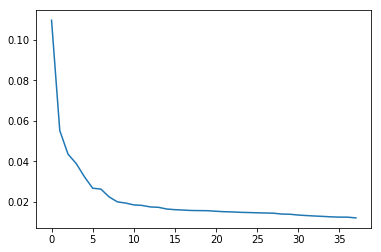

In [17]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)
plt.plot(var)
plt.show()

### Numerical Dataframe after PCA

In [18]:
num_cols3=pd.DataFrame(num_cols2,columns=range(pca_components))
num_cols3.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,6.076627,-0.575677,-0.841880,2.313944,0.844188,-1.124082,-2.584006,-0.594535,0.939601,-0.818944,...,-0.232521,-0.236592,0.908256,0.185777,0.063665,0.162707,-0.689815,1.252231,0.786739,0.841315
1,3.836042,0.261186,-0.171489,2.210323,-0.552976,-1.470234,-0.944588,-0.087564,0.673511,0.924485,...,0.741431,-0.466551,-0.285145,0.452369,-0.418338,-0.061422,1.132073,0.632208,0.095734,0.971994
2,4.018008,3.167597,-0.223201,-1.768088,-0.478885,-2.902527,0.474748,-0.042028,-0.159062,0.415008,...,-0.048935,0.937004,-0.931084,1.254646,-1.259625,-0.150548,-0.322628,-0.026147,0.010269,-0.705993
3,0.770249,0.819915,-0.247511,-1.506793,0.210980,1.277786,0.028599,1.994898,-0.369985,-0.451570,...,-1.241423,0.371171,-0.443772,-1.119460,1.656568,-0.067804,-1.059020,-0.835921,0.613648,-0.869783
4,1.525670,0.431122,3.045903,1.629937,-2.787773,0.009762,-2.714656,1.502891,0.979560,2.698379,...,-0.190738,-1.264388,-0.912625,1.190297,0.039980,-1.009747,-0.134169,0.374120,-1.175972,-1.003526


## fill missing values with fillna() method----Another way

In [19]:
#num_cols.fillna(num_cols.mean(), inplace=True)
#num_cols.head()

## Data of categorical values

In [20]:
cat_cols=pd.DataFrame(train_data1.select_dtypes(include=['object']))
cat_cols.head()

,release,c_0332,c_0337,c_0339,c_0348,c_0351,c_0357,c_0361,c_0364,c_0368,...,c_1333,c_1335,c_1343,c_1347,c_1348,c_1361,c_1363,c_1372,c_1374,c_1377
0,a,NaN,a,NaN,f,o,NaN,NaN,a,b,...,e,w,b,NaN,b,e,b,a,q,NaN
1,a,NaN,a,NaN,k,s,NaN,NaN,a,b,...,e,q,b,NaN,b,e,b,a,NaN,NaN
2,a,NaN,b,NaN,p,f,NaN,NaN,b,b,...,e,u,a,NaN,b,c,a,a,b,NaN
3,a,NaN,a,NaN,f,o,NaN,NaN,b,b,...,NaN,w,a,NaN,b,g,a,a,NaN,NaN
4,c,a,a,b,t,c,NaN,b,a,b,...,e,b,b,d,b,e,b,a,a,NaN


In [21]:
cat_cols.isnull().sum().head()

release        0
c_0332     11478
c_0337      4559
c_0339     11473
c_0348      5810
dtype: int64

In [22]:
cat_cols.values

array([['a', nan, 'a', ..., 'a', 'q', nan],
       ['a', nan, 'a', ..., 'a', nan, nan],
       ['a', nan, 'b', ..., 'a', 'b', nan],
       ..., 
       ['c', 'a', 'b', ..., 'a', nan, 'b'],
       ['b', nan, nan, ..., 'a', nan, nan],
       ['a', nan, 'a', ..., 'a', nan, nan]], dtype=object)

from sklearn.preprocessing import Imputer
imputer =Imputer(missing_values=np.nan, strategy='most_frequent', axis=0)
imputer=imputer.fit(cat_cols)
imputed_data=imputer.transform(cat_cols.values)
cat_cols1=pd.DataFrame(imputed_data,columns=cat_cols.columns)
cat_cols1.head()

In [23]:
cat_cols.isnull().sum().head()

release        0
c_0332     11478
c_0337      4559
c_0339     11473
c_0348      5810
dtype: int64

In [24]:
cat_cols.head()

,release,c_0332,c_0337,c_0339,c_0348,c_0351,c_0357,c_0361,c_0364,c_0368,...,c_1333,c_1335,c_1343,c_1347,c_1348,c_1361,c_1363,c_1372,c_1374,c_1377
0,a,NaN,a,NaN,f,o,NaN,NaN,a,b,...,e,w,b,NaN,b,e,b,a,q,NaN
1,a,NaN,a,NaN,k,s,NaN,NaN,a,b,...,e,q,b,NaN,b,e,b,a,NaN,NaN
2,a,NaN,b,NaN,p,f,NaN,NaN,b,b,...,e,u,a,NaN,b,c,a,a,b,NaN
3,a,NaN,a,NaN,f,o,NaN,NaN,b,b,...,NaN,w,a,NaN,b,g,a,a,NaN,NaN
4,c,a,a,b,t,c,NaN,b,a,b,...,e,b,b,d,b,e,b,a,a,NaN


## Label Encoding

In [25]:

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le.fit_transform(cat_cols[cat_cols.columns[0]])
 

array([0, 0, 0, ..., 2, 1, 0], dtype=int64)

X=cat_cols
X.shape[1]
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
#### encode string input values as integers
features = []
for i in range(0, X.shape[1]):
    le= LabelEncoder()
    feature = le.fit_transform(X[:,i])
    features.append(feature)
encoded_x = numpy.array(features)
encoded_x = encoded_x.reshape(X.shape[0], X.shape[1])

In [26]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#X = enc.fit_transform()

## Create dummies for categorical data

In [27]:
cat_cols1=pd.get_dummies(cat_cols,drop_first=True)
cat_cols1.head()

,release_b,release_c,c_0332_b,c_0337_b,c_0339_b,c_0348_b,c_0348_c,c_0348_d,c_0348_e,c_0348_f,...,c_1374_p,c_1374_q,c_1374_r,c_1374_s,c_1374_t,c_1374_u,c_1374_v,c_1374_w,c_1374_x,c_1377_b
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standardizing the features before PCA 

In [28]:
from sklearn.preprocessing import StandardScaler
cat_cols1 = StandardScaler().fit_transform(cat_cols1)

## PCA  dimension reduction for Categorical data
The code below has .60 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 60% of the variance is retained.

In [29]:
from sklearn.decomposition import PCA
pca=PCA(.6)## It explains only 60% of information of data (variance)
#pca = PCA(n_components=100)
print(pca)
cat_cols2=pca.fit_transform(cat_cols1)
#pca.explained_variance_ratio_
pca_components=pca.n_components_
pca_components

PCA(copy=True, iterated_power='auto', n_components=0.6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


107

[ 0.02679439  0.02642671  0.02371888  0.0219521   0.02070411  0.02005309
  0.01766455  0.01641551  0.01633338  0.01613156  0.01580698  0.01567722
  0.01547845  0.01542775  0.01519776  0.01489218  0.0148348   0.01470454
  0.0133095   0.01226885  0.01201531  0.01190464  0.00981621  0.00545096
  0.00503073  0.00491301  0.00477343  0.00462125  0.0046146   0.00451329
  0.0044433   0.00431633  0.00431042  0.00421134  0.00405427  0.00401226
  0.00398375  0.00388442  0.00385817  0.00368885  0.00352271  0.00350337
  0.00311637  0.00307106  0.00298952  0.00293322  0.00281204  0.00275007
  0.00264365  0.00262202  0.00260357  0.00258301  0.00254042  0.00251813
  0.00244518  0.00243345  0.00239394  0.00237841  0.00236005  0.00231069
  0.00230358  0.00229672  0.00227445  0.00224102  0.00220519  0.00219626
  0.00215202  0.00215063  0.00211001  0.00208484  0.00203609  0.00202591
  0.00200112  0.00199126  0.00198299  0.00195782  0.00195207  0.00192911
  0.00189559  0.00185401  0.00182853  0.00177746  0

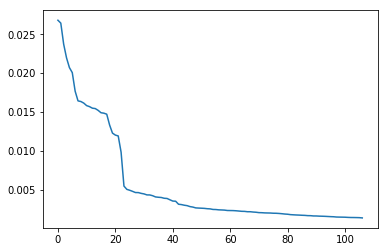

In [30]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)
plt.plot(var)
plt.show()

[  2.68   5.32   7.69   9.89  11.96  13.97  15.74  17.38  19.01  20.62
  22.2   23.77  25.32  26.86  28.38  29.87  31.35  32.82  34.15  35.38
  36.58  37.77  38.75  39.3   39.8   40.29  40.77  41.23  41.69  42.14
  42.58  43.01  43.44  43.86  44.27  44.67  45.07  45.46  45.85  46.22
  46.57  46.92  47.23  47.54  47.84  48.13  48.41  48.69  48.95  49.21
  49.47  49.73  49.98  50.23  50.47  50.71  50.95  51.19  51.43  51.66
  51.89  52.12  52.35  52.57  52.79  53.01  53.23  53.45  53.66  53.87
  54.07  54.27  54.47  54.67  54.87  55.07  55.27  55.46  55.65  55.84
  56.02  56.2   56.38  56.55  56.72  56.89  57.06  57.22  57.38  57.54
  57.7   57.86  58.02  58.18  58.33  58.48  58.63  58.78  58.93  59.08
  59.22  59.36  59.5   59.64  59.78  59.92  60.06]


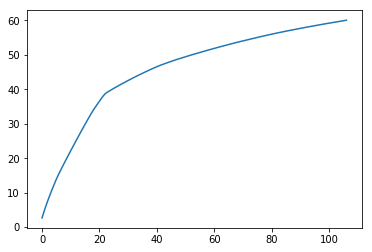

In [31]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.show()

In [32]:
cat_cols3=pd.DataFrame(cat_cols2,columns=range(pca_components))
cat_cols3.head()

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,-3.865386,2.556807,3.681880,-15.224890,4.279613,0.147086,2.100572,-0.543714,0.372799,-0.143391,...,0.299181,-0.008618,0.619781,0.517230,0.799506,0.479193,0.843827,-0.121862,-0.036323,1.659200
1,21.529277,-3.590833,-4.005520,-5.064366,0.788735,-0.087048,1.338029,-0.331564,-0.039704,-0.365968,...,0.705169,2.179614,-0.522191,0.808050,-0.402503,0.616112,0.012346,-0.076488,0.600821,0.090781
2,-2.334431,-0.877170,-1.824529,5.267432,-5.525926,-0.418878,-4.789190,1.149211,-6.212808,0.693064,...,-0.622233,-1.566857,-0.174112,-1.556901,-0.089777,-1.164885,0.675022,-0.842040,-0.687266,-0.205784
3,-3.332479,1.652325,-1.458106,-4.135491,-1.826478,-0.275238,-2.746400,0.612412,-3.701697,1.109242,...,-0.148448,0.056956,-0.803545,-1.891400,-0.904441,-1.079570,-0.090293,-1.104750,-1.398273,-1.762685
4,3.638207,10.395848,2.136656,3.521392,-2.238446,0.374907,17.678830,1.927444,0.415258,-10.599071,...,-0.362726,-2.766235,-0.267289,0.542895,-1.148641,0.430036,2.340067,-0.171911,-3.353311,-1.382947


## Concat numerical and categorical data

In [33]:
train_data2=pd.concat([num_cols3,cat_cols3],axis=1)
#train_data2=pd.merge(numeric_cols,cat_cols,on='id',how='outer')

train_data2.shape
train_data2.head()

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,6.076627,-0.575677,-0.841880,2.313944,0.844188,-1.124082,-2.584006,-0.594535,0.939601,-0.818944,...,0.299181,-0.008618,0.619781,0.517230,0.799506,0.479193,0.843827,-0.121862,-0.036323,1.659200
1,3.836042,0.261186,-0.171489,2.210323,-0.552976,-1.470234,-0.944588,-0.087564,0.673511,0.924485,...,0.705169,2.179614,-0.522191,0.808050,-0.402503,0.616112,0.012346,-0.076488,0.600821,0.090781
2,4.018008,3.167597,-0.223201,-1.768088,-0.478885,-2.902527,0.474748,-0.042028,-0.159062,0.415008,...,-0.622233,-1.566857,-0.174112,-1.556901,-0.089777,-1.164885,0.675022,-0.842040,-0.687266,-0.205784
3,0.770249,0.819915,-0.247511,-1.506793,0.210980,1.277786,0.028599,1.994898,-0.369985,-0.451570,...,-0.148448,0.056956,-0.803545,-1.891400,-0.904441,-1.079570,-0.090293,-1.104750,-1.398273,-1.762685
4,1.525670,0.431122,3.045903,1.629937,-2.787773,0.009762,-2.714656,1.502891,0.979560,2.698379,...,-0.362726,-2.766235,-0.267289,0.542895,-1.148641,0.430036,2.340067,-0.171911,-3.353311,-1.382947


## Import lables data(dependent)

In [34]:
train_labels= pd.read_csv("D:\\Capstone project\\Capstone Project\\train labels.csv")

#train_labels.shape
#(14644, 15)
train_labels.sum().head()

id           134128917
service_a         6909
service_b         4852
service_c         3868
service_d          225
dtype: int64

### servive_j-->12445
### service_k-->11409

In [35]:
train_labels1=pd.DataFrame(train_labels['service_j'])
train_labels1.shape
train_labels1.head()

,service_j
0,1
1,1
2,1
3,1
4,0


In [36]:
X=train_data2
X=np.array(train_data2)
y=train_labels1
y=np.array(train_labels1).ravel()
names=train_data2.columns
#data=pd.concat([X,y],axis=1)
#data.head()
#data=np.array(data)
#data.shape

In [37]:
y.shape

(14644,)

In [38]:
test_data= pd.read_csv("D:\\Capstone project\\Capstone Project\\test Data.csv",low_memory=False)
test_data.shape

(3661, 1379)

In [39]:
#train_data2-->(14644, 145)
#test_data-->(3661, 1379)

### service_j --> 12445
### service_k -->11409
These 2 services are better to build model.

## Build the model

In [77]:
import xgboost
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#X, y = data.make_classification(n_samples=500, n_features=none,  n_informative=2, n_redundant=10,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  
                                                    random_state=42)

#model=xgboost.XGBClassifier()
#model.fit(np.array(X),y)
#print(model)

from xgboost.sklearn import XGBClassifier 

model = XGBClassifier()  # and for classifier  
model.fit(X_train, y_train)  
model.predict(X_test)  

In [91]:
from xgboost.sklearn import XGBClassifier 

from sklearn.grid_search import GridSearchCV

cv_params = {'max_depth': [3,5,7], 'min_child_weight': [3,5]}



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [ ]:
from xgboost.sklearn import XGBClassifier 
model = XGBClassifier(learning_rate =0.3,
 n_estimators=200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)  # and for classifier  
 
model.fit(X_train, y_train)  

In [92]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
cross_val_score(model, X_train, y_train)  


array([ 0.85513608,  0.86098917,  0.85216628])

In [95]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [85]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.05%


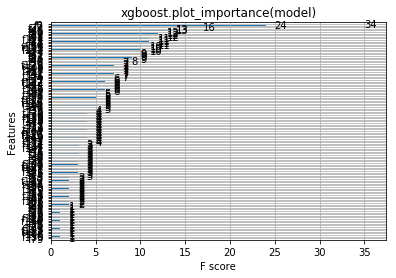

In [86]:
xgboost.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

xgboost.plot_importance(model, importance_type="cover")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()


xgboost.plot_importance(model, importance_type="gain")
plt.title('xgboost.plot_importance(model, importance_type="gain")')
plt.show()